In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(8982,) (8982,)
(2246,) (2246,)


In [ ]:
# 텍스트로 디코딩 한다.
word_idx = reuters.get_word_index() #단어 인덱스 딕셔너리
reverse_word_index = dict( # 딕셔너리 뒤집어서 매핑 할 수 있게 함
    [(value, key) for (key, value) in word_idx.items()]
)
decoded_review = ' '.join( # 0,1,2 부분이 패딩, 문서 시작, 사전 없음 이라서 -3 해준다.
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]] #매핑 안되면 '?'로 바꾼다.
)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [ ]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

# 2. 데이터 준비


In [ ]:
# 멀티 핫 벡터로 인코딩
import numpy as np

def vectorize_sequences(sequences, dim = 10000):
    results = np.zeros((len(sequences),dim))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1.
    return results

def to_one_hot(labels, dim =46):
    results = np.zeros((len(labels),dim))
    for i, label in enumerate(labels):
        results[i,label]=1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
# 이와 같다
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# 3. 모델링


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"), #유닛 수, activation func
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
# 모델 컴파일: optimizer, loss, metric선택
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 4. Train

In [ ]:
# 검증을 위한 validation set만들어두기
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [ ]:
# 모델 학습하기
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # 전체 20 에폭 학습
    batch_size=512, #미니배치 크기 512
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.3962 - loss: 3.1813 - val_accuracy: 0.6340 - val_loss: 1.7897
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6617 - loss: 1.6012 - val_accuracy: 0.6800 - val_loss: 1.3765
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7322 - loss: 1.1889 - val_accuracy: 0.7340 - val_loss: 1.1960
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7891 - loss: 0.9688 - val_accuracy: 0.7640 - val_loss: 1.0948
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8169 - loss: 0.8421 - val_accuracy: 0.7890 - val_loss: 1.0027
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8555 - loss: 0.6648 - val_accuracy: 0.8000 - val_loss: 0.9586
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8799 - loss: 0.5695 - val_accuracy: 0.8020 - val_loss: 0.9315
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9004 - loss: 0.4642 - val_accuracy: 0.8190 - 

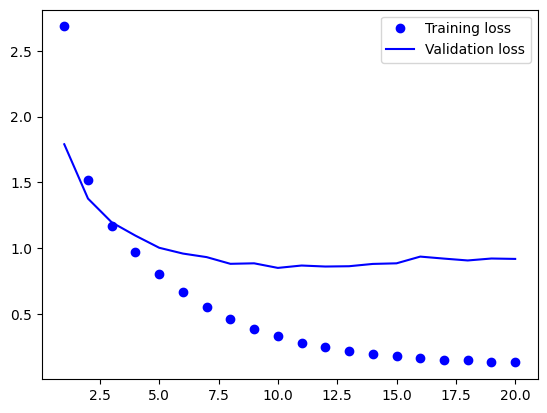

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.legend()
plt.show()

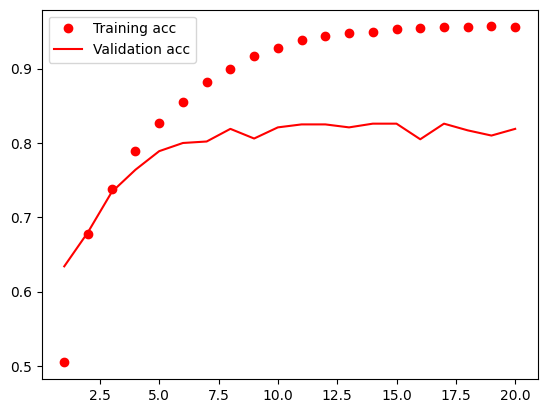

In [ ]:
plt.clf()
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test,y_test)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.4269 - loss: 3.1071 - val_accuracy: 0.6300 - val_loss: 1.7549
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6735 - loss: 1.5562 - val_accuracy: 0.6900 - val_loss: 1.3642
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7393 - loss: 1.1828 - val_accuracy: 0.7350 - val_loss: 1.1960
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7997 - loss: 0.9384 - val_accuracy: 0.7720 - val_loss: 1.0789
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8281 - loss: 0.7964 - val_accuracy: 0.7710 - val_loss: 1.0429
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8516 - loss: 0.6712 - val_accuracy: 0.7990 - val_loss: 0.9588
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8757 - loss: 0.5697 - val_accuracy: 0.7930 - val_loss: 0.9441
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9002 - loss: 0.4575 - val_accuracy: 0.8070 - val_loss

In [ ]:
results

[0.9601942896842957, 0.7791629433631897]

# 5. Test

In [ ]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

np.float32(1.0000001)

In [ ]:
np.argmax(predictions[0])

np.int64(3)

# 충분히 큰 중간층을 둬야 하는 이유

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test,y_test)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.2017 - loss: 3.6487 - val_accuracy: 0.3730 - val_loss: 3.2035
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3812 - loss: 3.0675 - val_accuracy: 0.3880 - val_loss: 2.7685
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3892 - loss: 2.6503 - val_accuracy: 0.3790 - val_loss: 2.4226
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3831 - loss: 2.3320 - val_accuracy: 0.3810 - val_loss: 2.1950
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3873 - loss: 2.1042 - val_accuracy: 0.3980 - val_loss: 2.0376
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4018 - loss: 1.9569 - val_accuracy: 0.4040 - val_loss: 1.9088
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4128 - loss: 1.8203 - val_accuracy: 0.5290 - val_loss: 1.8025
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5577 - loss: 1.6808 - val_accuracy: 0.5670 - 

# 추가실험

In [ ]:
# 더 큰 층 사용
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test,y_test)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.4363 - loss: 2.8319 - val_accuracy: 0.6680 - val_loss: 1.4684
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7156 - loss: 1.3056 - val_accuracy: 0.7230 - val_loss: 1.2014
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7766 - loss: 1.0039 - val_accuracy: 0.7670 - val_loss: 1.0316
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8321 - loss: 0.7472 - val_accuracy: 0.7950 - val_loss: 0.9516
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8713 - loss: 0.5958 - val_accuracy: 0.8050 - val_loss: 0.9199
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8992 - loss: 0.4662 - val_accuracy: 0.8100 - val_loss: 0.8730
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9219 - loss: 0.3637 - val_accuracy: 0.8090 - val_loss: 0.8865
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9343 - loss: 0.3066 - val_accuracy: 0.8220 - val_loss

In [ ]:
results

[0.9471673369407654, 0.7943009734153748]

In [ ]:
# 더 작은 층 사용
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test,y_test)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.2688 - loss: 3.4579 - val_accuracy: 0.3650 - val_loss: 2.4725
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4403 - loss: 2.2314 - val_accuracy: 0.6300 - val_loss: 1.7810
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6738 - loss: 1.6391 - val_accuracy: 0.6920 - val_loss: 1.4975
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7350 - loss: 1.3695 - val_accuracy: 0.7180 - val_loss: 1.3170
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7728 - loss: 1.1283 - val_accuracy: 0.7390 - val_loss: 1.2145
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7843 - loss: 1.0060 - val_accuracy: 0.7580 - val_loss: 1.1335
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8043 - loss: 0.8820 - val_accuracy: 0.7650 - val_loss: 1.0726
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8242 - loss: 0.7996 - val_accuracy: 0.7740 - 

In [ ]:
results

[1.00987708568573, 0.7818343639373779]